### Ques-3) Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

# Music Instrument Images

In [1]:
import os
import random
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

In [2]:
img = '../input/music-instrument-images-dataset/music_instruments_images'

In [3]:
labels=pd.read_csv('../input/music-instrument-images-dataset/music_data_img.csv')
labels

,Label,Instrument_Type,Image_File
0,yamaha (sy-77) music synthesizer,Keyboard / Piano,music_instruments_images/1634109508851_Yamaha ...
1,srx-718 bass bin (pair),Studio / Live Music Equipment,music_instruments_images/1634109509147_SRX718 ...
2,piano (malcom mendis piano),Keyboard / Piano,music_instruments_images/1634109509344_Piano M...
3,yamaha semi acoustic guitars,String Instrument / Amplifier,music_instruments_images/1634109509573_Yamaha ...
4,yamaha guitar,String Instrument / Amplifier,music_instruments_images/1634109510073_Yamaha ...
...,...,...,...
3239,axl as-820 sro guitar,String Instrument / Amplifier,music_instruments_images/1634119103025_AXL AS8...
3240,yamaha guitar,String Instrument / Amplifier,music_instruments_images/1634119103805_Yamaha ...
3241,shure sm58 vocal professional mic,Studio / Live Music Equipment,music_instruments_images/1634119104215_Shure S...
3242,electric guitar,String Instrument / Amplifier,music_instruments_images/1634119104510_Electri...


In [4]:
Name = labels['Instrument_Type'].unique().tolist()
print(Name)
print(len(Name))

['Keyboard / Piano', 'Studio / Live Music Equipment', 'String Instrument / Amplifier', 'Percussion / drums', 'Other Instrument', 'Woodwind / brass', 'Sheet Music', 'Vinyl']
8


In [5]:
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [6]:
labels['label']=labels['Instrument_Type'].map(normal_mapping)

In [7]:
files = labels['Image_File'].unique().tolist()
print(files[0:10])
print(len(files))

['music_instruments_images/1634109508851_Yamaha SY77 Music Synthesizer for sale.jpg', 'music_instruments_images/1634109509147_SRX718 BASS BIN PAIR for sale.jpg', 'music_instruments_images/1634109509344_Piano Malcom Mendis Piano for sale.jpg', 'music_instruments_images/1634109509573_Yamaha Semi Acoustic Guitars for sale.jpg', 'music_instruments_images/1634109510073_Yamaha Guitar for sale.jpg', 'music_instruments_images/1634109510808_Violin for sale.jpg', 'music_instruments_images/1634109511077_Expnsoin Card Xp 30506080 for sale.jpg', 'music_instruments_images/1634109511477_à·\x83à¶ºà·\x92à¶©à·\x8a à¶©à·\x8aâ\x80\x8dà¶»à¶¸à·\x8a for sale.jpg', 'music_instruments_images/1634109511904_semi acoustic box guitar for sale.jpg', 'music_instruments_images/1634109512354_32 keys Melodica full set for sale.jpg']
3244


In [8]:
dataset=[]
for i in tqdm(range(len(labels))):
    labeli=labels.loc[i,'label']
    filei=labels.loc[i,'Image_File']
    path=os.path.join(img,filei)
    img1=cv2.imread(path)
    img2=cv2.resize(img1,dsize=(100,100),interpolation=cv2.INTER_CUBIC)
    img3=img2.astype(np.float32)
    image=torch.from_numpy(img3)
    dataset+=[[image,labeli]]

100%|██████████| 3244/3244 [00:13<00:00, 248.43it/s]


In [9]:
dataset[100]

[tensor([[[ 11.,   1., 131.],
          [  9.,   0., 129.],
          [  9.,   0., 129.],
          ...,
          [  0.,   0.,  29.],
          [  1.,   1.,  43.],
          [  2.,   2.,  50.]],
 
         [[ 11.,   1., 131.],
          [ 10.,   0., 130.],
          [  9.,   1., 131.],
          ...,
          [  0.,   0.,  33.],
          [  2.,   2.,  44.],
          [  3.,   3.,  51.]],
 
         [[  9.,   2., 129.],
          [  9.,   1., 130.],
          [ 11.,   3., 133.],
          ...,
          [  1.,   1.,  37.],
          [  4.,   3.,  47.],
          [  4.,   3.,  53.]],
 
         ...,
 
         [[  6.,   1.,  94.],
          [  4.,   0.,  93.],
          [ 12.,   6., 101.],
          ...,
          [  3.,   2.,  52.],
          [  3.,   2.,  52.],
          [  2.,   2.,  50.]],
 
         [[  7.,   3.,  94.],
          [  6.,   0.,  94.],
          [ 16.,  10., 105.],
          ...,
          [  3.,   2.,  52.],
          [  3.,   2.,  52.],
          [  2.,   2.,  50.

In [10]:
# view one image shape of the dataset.
img, label = dataset[100]
print(img.shape)
print(label)

torch.Size([100, 100, 3])
3


In [11]:
def show_image(img,label):
    plt.imshow(img.numpy().astype(int))

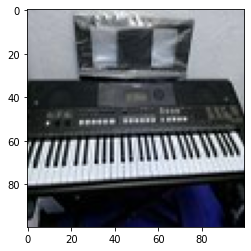

In [12]:
show_image(*dataset[20])

In [13]:
torch.manual_seed(20)
val_size = len(dataset)//10
test_size = len(dataset)//5
train_size = len(dataset) - val_size - test_size

In [14]:
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)   

(2272, 324, 648)

In [15]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

In [16]:
m=len(dataset)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

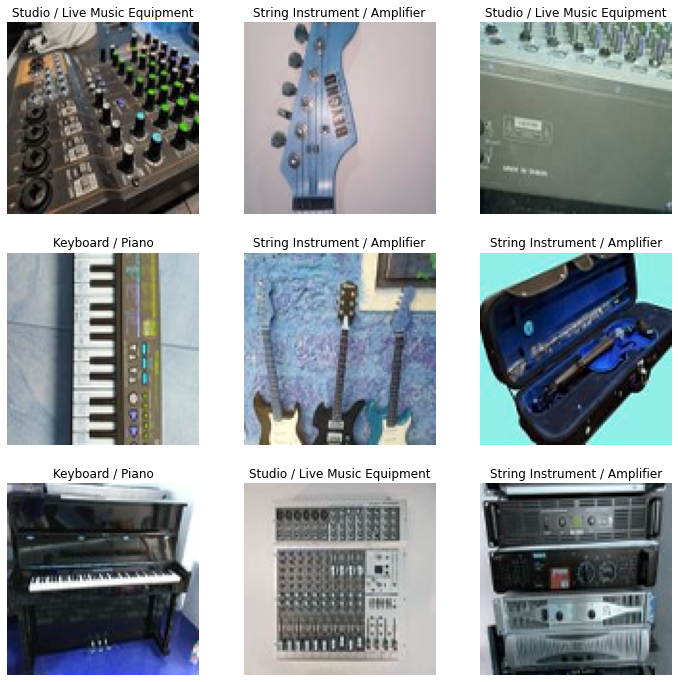

In [17]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1,label=dataset[M[i]]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(reverse_mapping[label])
    ax=axs[r][c].imshow(img1.numpy().astype(int))
plt.show()

In [18]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [19]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [20]:
torch.cuda.is_available()

False

In [21]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [22]:
device = get_default_device()
device

device(type='cpu')

In [23]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [24]:
input_size = 3*100*100
output_size = len(Name)

# Linear Model

In [25]:
class Model(ImageClassificationBase):
    def __init__(self, input_size, output_size):
        super().__init__()
        # hidden layer
        self.in_layer = nn.Linear(input_size, 8384)
        self.hidden1 = nn.Linear(8384, 4192)
        self.hidden2 = nn.Linear(4192, 2096)
        self.hidden3 = nn.Linear(2096, 1048)
        self.out_layer = nn.Linear(1048, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.in_layer(out)
        out = self.hidden1(F.relu(out))
        out = self.hidden2(F.relu(out))
        out = self.hidden3(F.relu(out))
        out = self.out_layer(F.relu(out))
        return out

In [26]:
model = to_device(Model(input_size, output_size), device)

In [27]:
model

Model(
  (in_layer): Linear(in_features=30000, out_features=8384, bias=True)
  (hidden1): Linear(in_features=8384, out_features=4192, bias=True)
  (hidden2): Linear(in_features=4192, out_features=2096, bias=True)
  (hidden3): Linear(in_features=2096, out_features=1048, bias=True)
  (out_layer): Linear(in_features=1048, out_features=8, bias=True)
)

In [28]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.7283132076263428, 'val_acc': 0.1770833283662796}]

In [29]:
history += fit(8, 0.01, model, train_loader, val_loader)

100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.49s/it]


Epoch [4], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [5], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:53<00:00,  1.48s/it]


Epoch [6], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [01:03<00:00,  1.78s/it]


Epoch [7], train_loss: nan, val_loss: nan, val_acc: 0.1094


In [30]:
history += fit(8, 0.001, model, train_loader, val_loader)

100%|██████████| 36/36 [00:55<00:00,  1.55s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:54<00:00,  1.52s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:55<00:00,  1.53s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:54<00:00,  1.52s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:54<00:00,  1.51s/it]


Epoch [4], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:54<00:00,  1.52s/it]


Epoch [5], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:55<00:00,  1.53s/it]


Epoch [6], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:55<00:00,  1.54s/it]


Epoch [7], train_loss: nan, val_loss: nan, val_acc: 0.1094


In [31]:
history += fit(4, 0.0001, model, train_loader, val_loader)

100%|██████████| 36/36 [00:55<00:00,  1.53s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:59<00:00,  1.65s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [01:01<00:00,  1.71s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.1094


100%|██████████| 36/36 [00:55<00:00,  1.55s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.1094


In [32]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

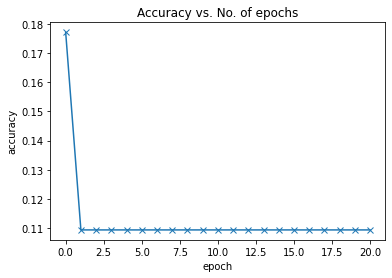

In [33]:
plot_accuracies(history)

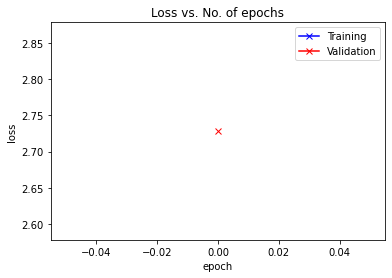

In [34]:
plot_losses(history)

In [35]:
evaluate(model, test_loader)

{'val_loss': nan, 'val_acc': 0.10369317978620529}